# Natural language processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Task 1

Загрузи датасет. Отрисуй Bar-plot с количеством комментариев для каждой категории токсичности
и комментариев без токсичности.
![sample](../misc/images/bar-plot.png)
Выведи эти количества для каждой категории.

In [3]:
df = pd.read_csv("toxic.csv")
df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
#количество токсичных комментариев
df_col = df.columns[2:]
#df[df_col].sum()

In [5]:
#добавим нетоксичные комментарии
def not_tox(row,df_col):
  for a in df_col:
    if row[a] == 1:
      return 0
  return 1

df["not_tox"] = df.apply(lambda row: not_tox(row, df_col), axis=1)
df_col = df.columns[2:]

In [6]:
#данные для диаграммы
bar_data = df[df_col].sum()
bar_data = bar_data.sort_values(ascending = False)
bar_data1 = dict(bar_data)

In [7]:
import seaborn as sns

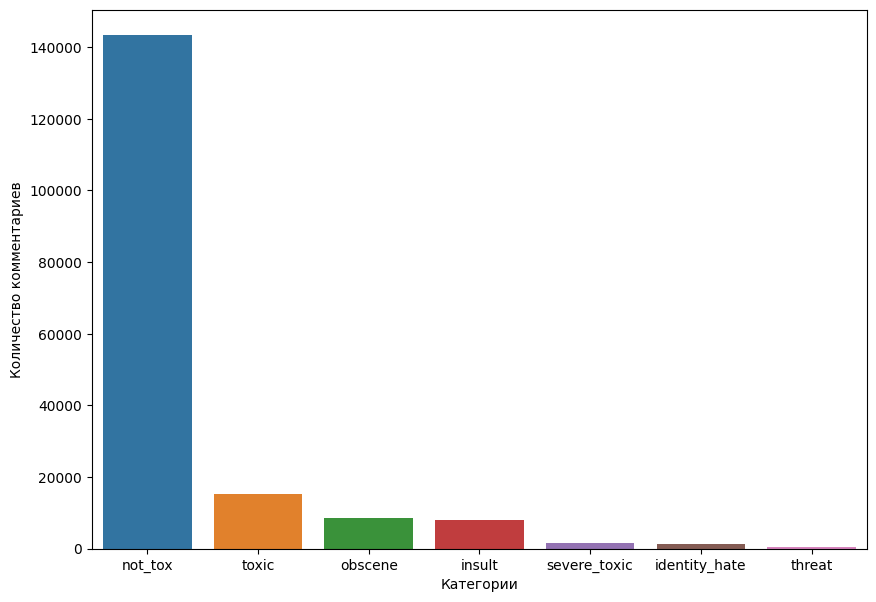

In [8]:
#строим диаграмму
fig = plt.figure(figsize =(10, 7))
#plt.bar(bar_data.keys(), bar_data.values(), width = 0.4) - всё одним цветом :P
sns.barplot(x = list(bar_data1.keys()), y = list(bar_data1.values()))
plt.xlabel("Категории")
plt.ylabel("Количество комментариев")
plt.show()

In [9]:
print("Количество комментариев для каждой категории:")
print(bar_data)

Количество комментариев для каждой категории:
not_tox          143346
toxic             15294
obscene            8449
insult             7877
severe_toxic       1595
identity_hate      1405
threat              478
dtype: int64


## Task 2

Используя библиотеку [nltk](https://www.nltk.org/) обработайте тексты комментариев:
* Приведи текст к нижнему регистру и токенизируй
* Оставь токены содержащие английского алфавита
* Убери знаки препинания, цифры
* Убери стоп-слова из библиотки nltk

Выведи количество токенов для комментария с индексом `000103f0d9cfb60f`

In [10]:
import nltk

In [11]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HELLEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HELLEN\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HELLEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
sw = set(stopwords.words("english"))
def good_word(word):
  if (word.isalpha() and word not in sw):
    return True
  return False
def process_one(text):
   return(list(filter(good_word, word_tokenize(text = text.lower(), language= "english"))))

filtered_tokens = df['comment_text'].apply(process_one)
df["tokens"] = filtered_tokens
#df.head()

In [13]:
# Выведи количество токенов для комментария с индексом 000103f0d9cfb60f
print('Количество токенов для комментария с индексом 000103f0d9cfb60f: ' + str(len(df.loc[df["id"] == "000103f0d9cfb60f"]['tokens'][1])))


Количество токенов для комментария с индексом 000103f0d9cfb60f: 9


## Task 3

Раздели выборку на тренировачную и тестовоую с параметрами `random_state=21, test_size=0.3, shuffle=True`
Преобразуй тексты комментариев с помощью [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) с количеством признаков равный 3000. \
Выведи размерность тренировачной выборки после преобразования текста.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf = True,max_features = 3000)
x = vectorizer.fit_transform(df["comment_text"])
x

<159571x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 5753907 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, df.loc[:, df.columns[2:9]],
                                                    test_size = 0.3,
                                                    random_state = 21,
                                                    shuffle = True)
print(f'Размерность тренировочной выборки после преобразования текста: {x_train.shape}')

Размерность тренировочной выборки после преобразования текста: (111699, 3000)


## Task 4

Реши задачу [Multi-Label](https://scikit-learn.org/stable/modules/multiclass.html) классификации используя [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier).
Посчитай значение ROC-AUC для тестовой выборки.

In [16]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score
clf = RidgeClassifier().fit(x_train, y_train)
first_score = roc_auc_score(y_test, clf.decision_function(x_test), average=None)
print(f'Значения ROC-AUC для тестовой выборки: {first_score}')

Значения ROC-AUC для тестовой выборки: [0.95687533 0.96904205 0.97261764 0.96955353 0.96791932 0.93565869
 0.95670606]


## Task 5

Есть посмотреть на тексты токсичных комментариев, то можно заметить, что они могут повторять одни и те же слова. Или там чаще встречается `!` знаки. \
Кроме 'прямых' текстовых признаков, можно использоваться и эту статистику по тексту. Например, долю уникальных слов в тексте комментария или количество пунктуации в тексте.

Придумай не меньше 4х признаков, которые могут помочь в обучении модели. Добавьте их к признакам TF-IDF и обучите модель.
Получилось ли увеличить качество классификации?

In [17]:
text = df['comment_text']

In [18]:
def process_two(text):
#доля "!?"
  expressions = text.count("!") + text.count("?")

#доля уникальных слов
  unique = set(text.split())
  part_uni = len(unique)/len(filtered_tokens)

#количество пунктуационных знаков и гласных букв в тексте
  znaki = ['a', 'e', 'i' , 'o' , 'u' , ',' , '.', '!' , '?']
  out_lst=[]

  for x in text:
      if x in znaki:
          out_lst.append(x)
  part_z = len(out_lst)/len(filtered_tokens)

#клавиша Caps Lock
  caps = 0
  for word in text:
    if word.isupper():
      caps += 1
  part_caps = caps/len(filtered_tokens)

#количество слов в комментарии
  length = len(filtered_tokens)

  return([expressions, part_uni, part_z, part_caps, length])

statistica = np.stack(df['comment_text'].apply(process_two).values)
#statistica

In [19]:
#df.head()

In [20]:
# перезаписываем х

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf = True,max_features = 3000)
x = vectorizer.fit_transform(df["comment_text"])
x

from scipy.sparse import *
x = hstack((x,statistica))
x

<159571x3005 sparse matrix of type '<class 'numpy.float64'>'
	with 6441926 stored elements in COOrdinate format>

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, df.loc[:, df.columns[2:9]],
                                                    test_size = 0.3,
                                                    random_state = 21,
                                                    shuffle = True)

In [22]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score
clf = RidgeClassifier().fit(x_train, y_train)
second_score = roc_auc_score(y_test, clf.decision_function(x_test), average=None)
print(f'Значения ROC-AUC для улучшенной тестовой выборки: {second_score}')

Значения ROC-AUC для улучшенной тестовой выборки: [0.95698682 0.96995621 0.97268079 0.96958174 0.96797452 0.93565361
 0.95680728]
